In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dir_data = 'data/'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
group_names=['0', '1~2', '3~5', '>5'];

In [25]:
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, [-1, 0, 2, 5, float("inf")], labels = group_names, include_lowest = True)

In [26]:
app_train['CNT_CHILDREN_GROUP']

0           0
1           0
2           0
3           0
4           0
5           0
6         1~2
7           0
8           0
9           0
10        1~2
11          0
12          0
13        1~2
14          0
15          0
16          0
17        1~2
18          0
19        1~2
20          0
21        1~2
22        1~2
23          0
24        1~2
25          0
26          0
27        1~2
28          0
29          0
         ... 
307481      0
307482      0
307483      0
307484      0
307485    1~2
307486    1~2
307487      0
307488      0
307489      0
307490      0
307491    1~2
307492      0
307493      0
307494    1~2
307495      0
307496      0
307497      0
307498      0
307499      0
307500      0
307501    3~5
307502    1~2
307503      0
307504      0
307505      0
307506      0
307507      0
307508      0
307509      0
307510      0
Name: CNT_CHILDREN_GROUP, Length: 307511, dtype: category
Categories (4, object): [0 < 1~2 < 3~5 < >5]

In [28]:
app_train['CNT_CHILDREN_GROUP'].value_counts()

0      215371
1~2     87868
3~5      4230
>5         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [42]:
grouped_df = app_train.groupby(['CNT_CHILDREN_GROUP', 'TARGET'])['AMT_INCOME_TOTAL']

In [43]:
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0                   0         166747.010980
                    1         160804.210548
1~2                 0         174590.584401
                    1         176115.362720
3~5                 0         175053.742913
                    1         160677.385714
>5                  0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

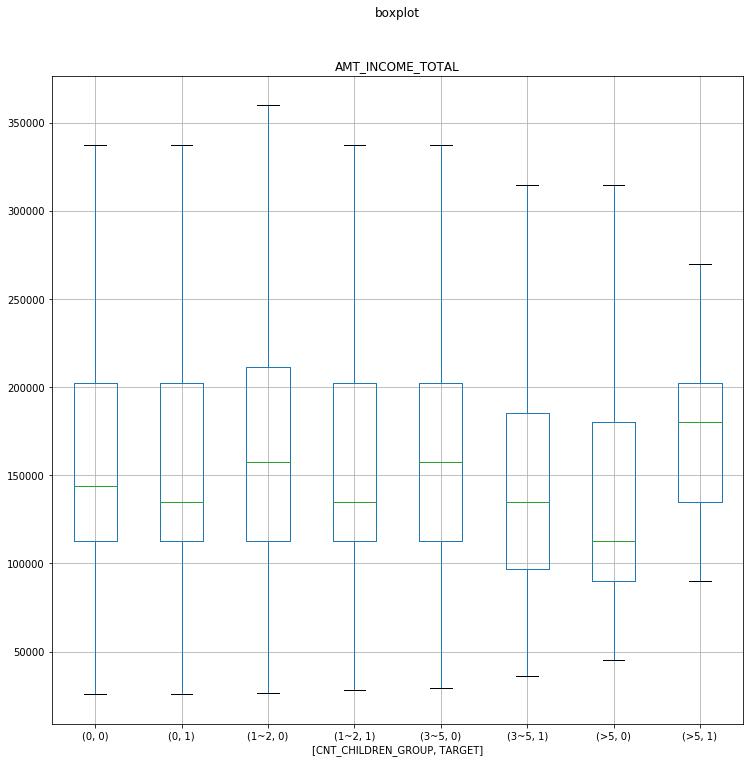

In [44]:
app_train.boxplot(column=['AMT_INCOME_TOTAL'] , by = ['CNT_CHILDREN_GROUP', 'TARGET'], showfliers = False, figsize=(12,12))
plt.suptitle('boxplot')
plt.show()

In [45]:
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())

In [46]:
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
